In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


In [ ]:
## Objective

Predict body performance by using body performance data from https://www.kaggle.com/datasets/kukuroo3/body-performance-data
class : A,B,C,D ( A: best) 

In [2]:
body_perf_dc = pd.read_csv(r'../data/bodyPerformance.csv')
body_perf_dc.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [3]:
body_perf_dc.shape

(13393, 12)

In [4]:
body_perf_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
np.sort(body_perf_dc['class'].unique())

array(['A', 'B', 'C', 'D'], dtype=object)

In [6]:
body_perf_dc = body_perf_dc.replace({'gender':{'M':0 , 'F':1}, \
                                    'class':{'A':1, 'B':2, 'C':3, 'D':4}})
body_perf_dc.head()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0       0      172.3      75.24        21.3       80.0     130.0   
1  25.0       0      165.0      55.80        15.7       77.0     126.0   
2  31.0       0      179.6      78.00        20.1       92.0     152.0   
3  32.0       0      174.5      71.10        18.4       76.0     147.0   
4  28.0       0      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  class  
0       54.9                     18.4            60.0          217.0      3  
1       36.4                     16.3            53.0          229.0      1  
2       44.8                     12.0            49.0          181.0      3  
3       41.4                     15.2            53.0          219.0      2  
4       43.5                     27.1            45.0          217.0      2

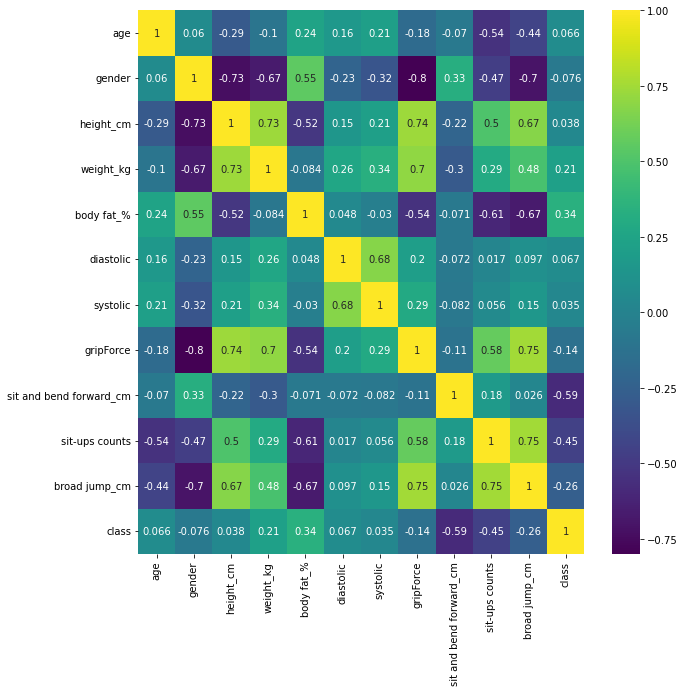

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(body_perf_dc.corr(), ax=ax, cmap='viridis', annot=True)

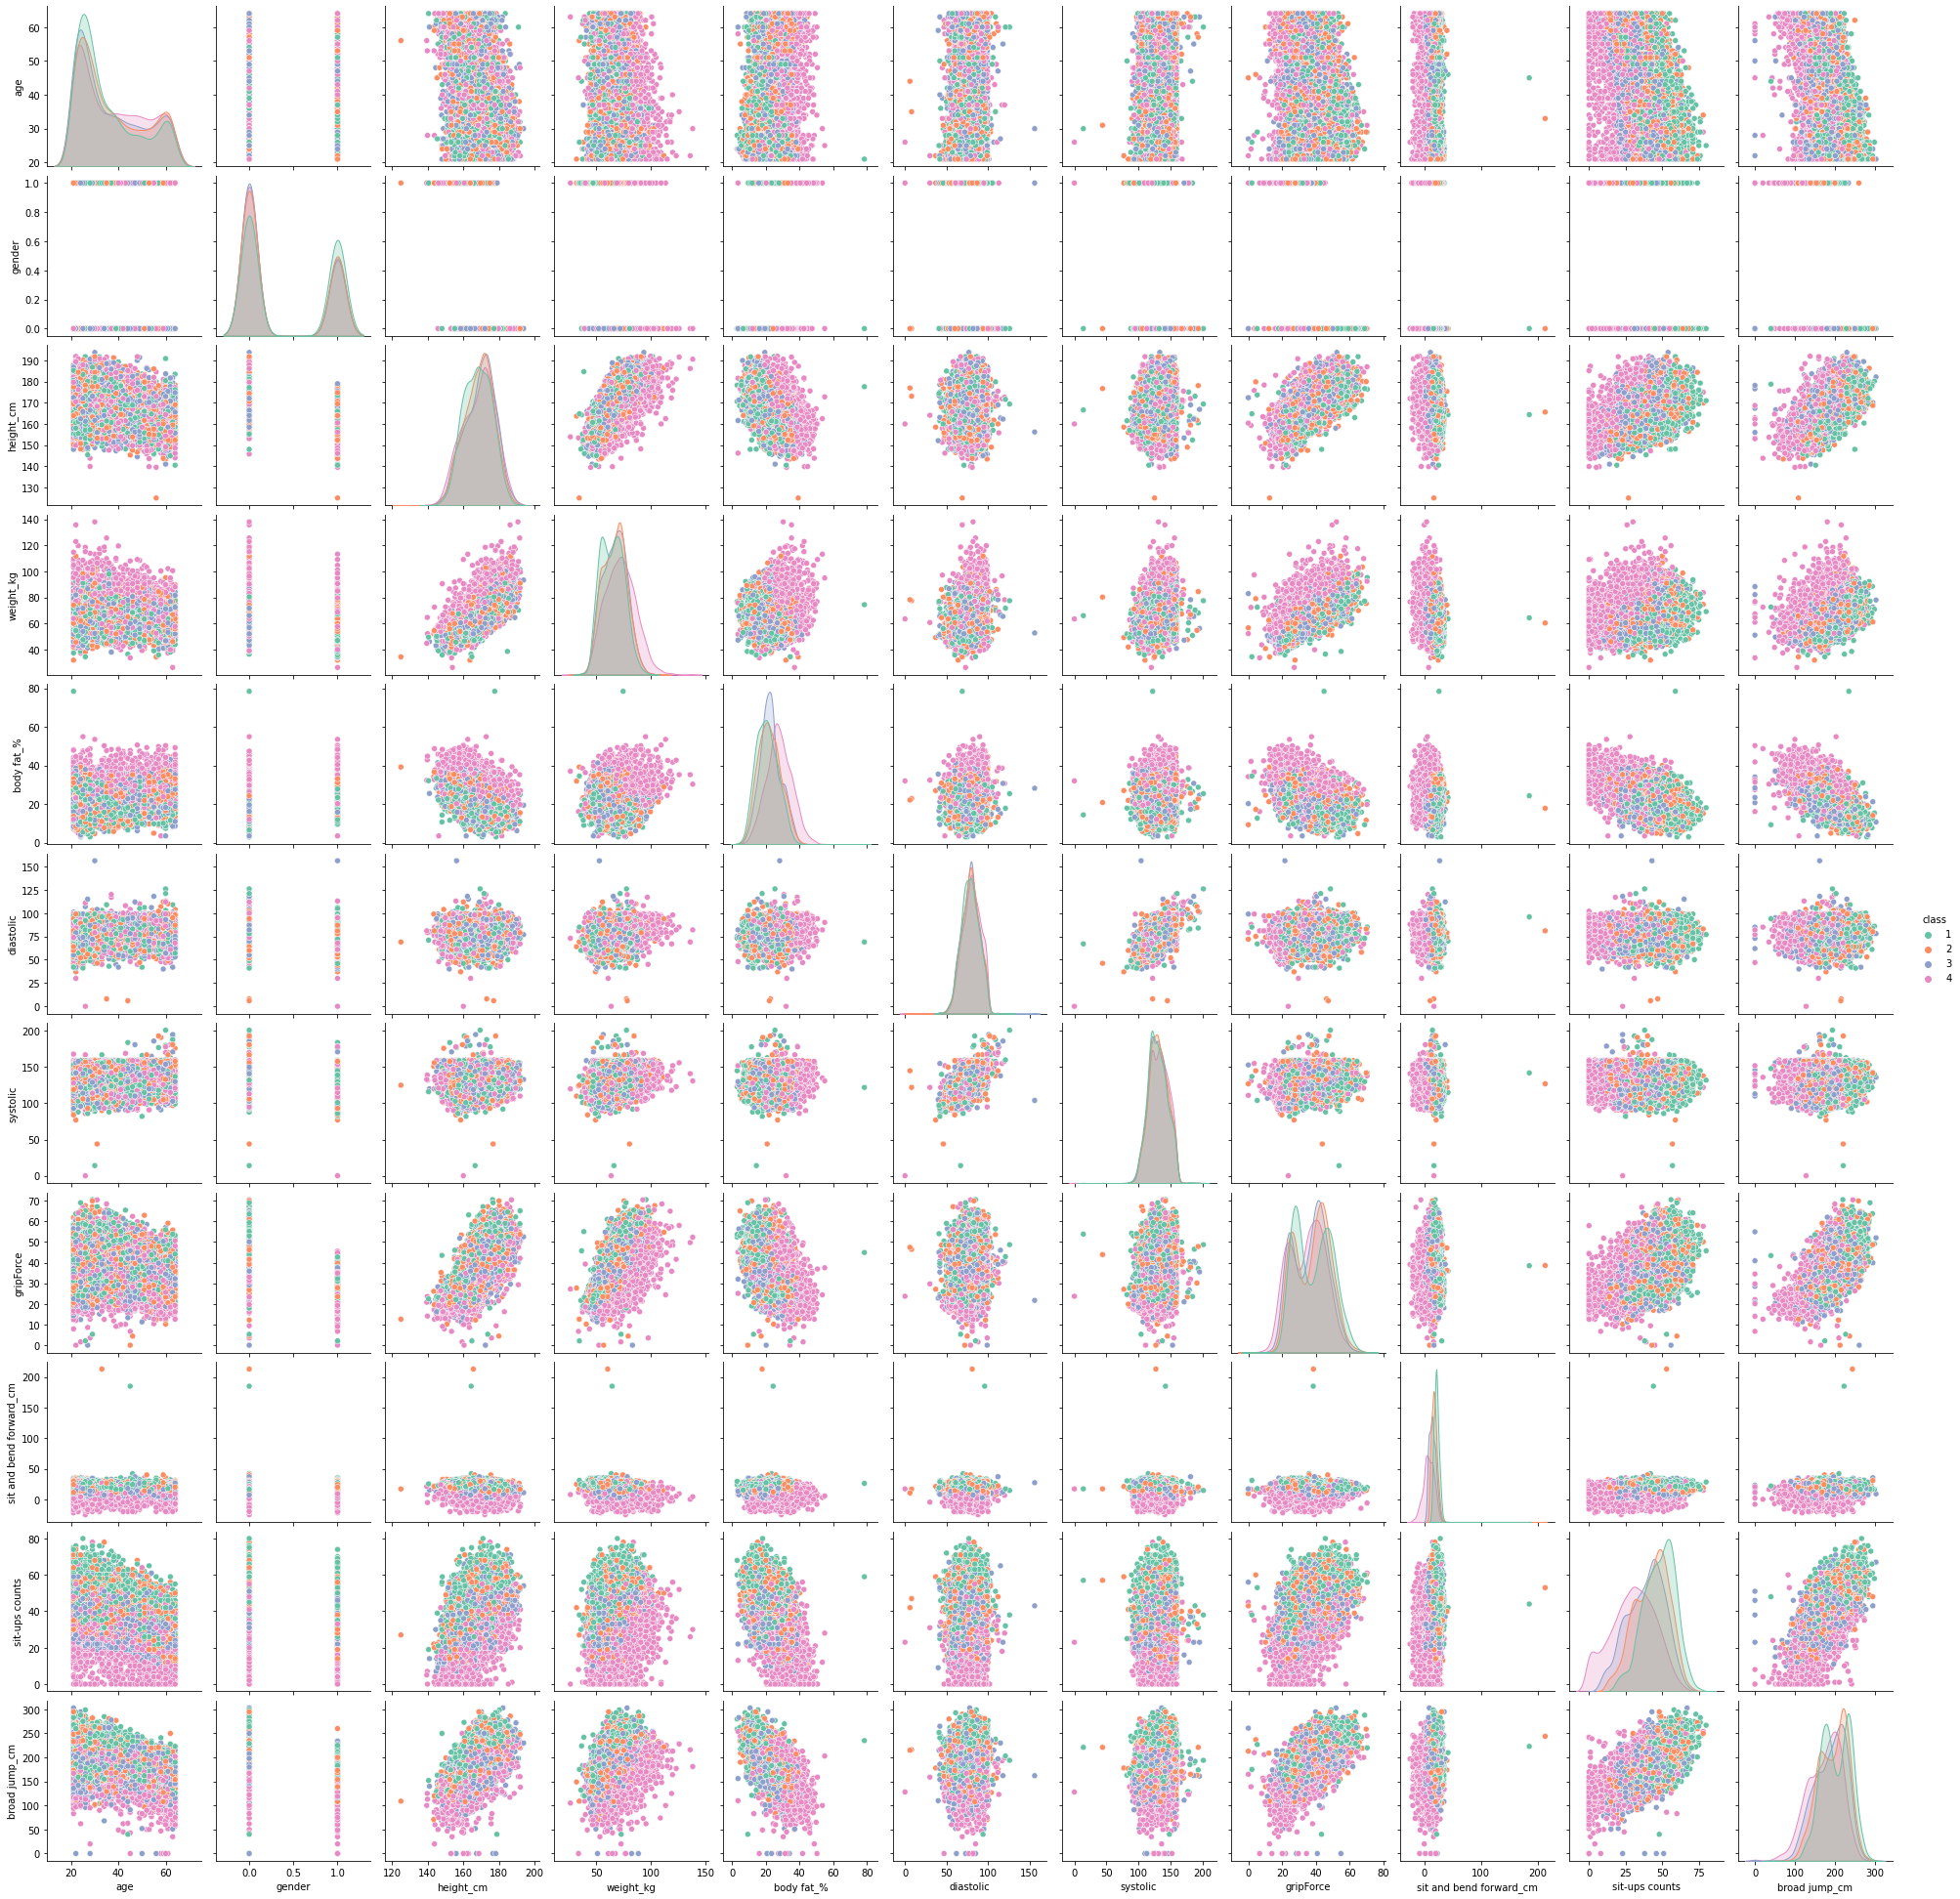

In [8]:
sns.pairplot(body_perf_dc, hue="class", palette="Set2");

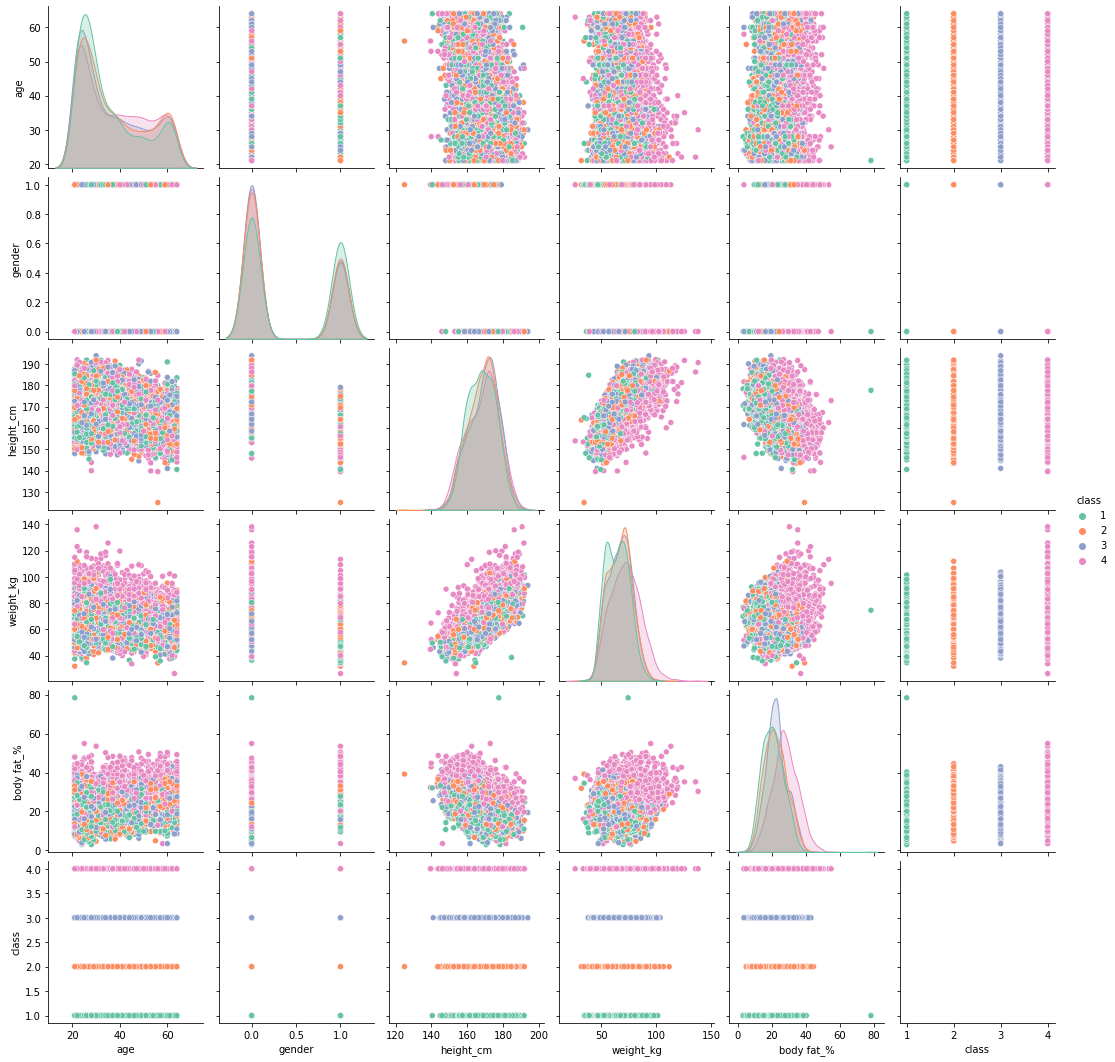

In [9]:
sns.pairplot(body_perf_dc , hue="class", palette="Set2", vars = ["age","gender","height_cm","weight_kg","body fat_%","class"]);

In [10]:
px.scatter(body_perf_dc, x='weight_kg', y='age', size="body fat_%", color='class',
                title="Classes by Age and Weight")

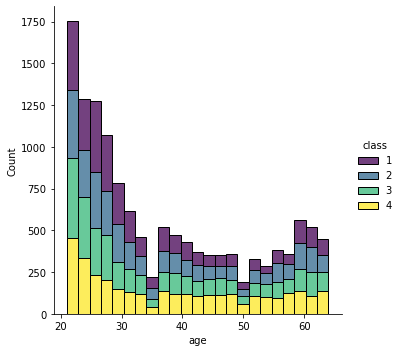

In [11]:
# age and body performance class 

sns.displot(data=body_perf_dc, x="age", hue="class", multiple="stack", palette="viridis")


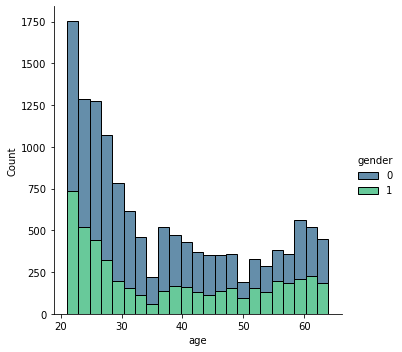

In [12]:
# Age and gender distribution
sns.displot(data=body_perf_dc, x="age", hue="gender", multiple="stack", palette="viridis")

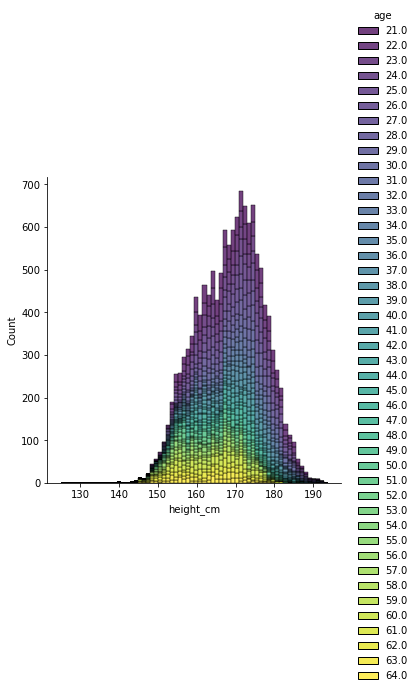

In [13]:
# Age and height distribution
sns.displot(data=body_perf_dc, x="height_cm", hue="age", multiple="stack", palette="viridis")

<AxesSubplot:xlabel='height_cm', ylabel='age'>

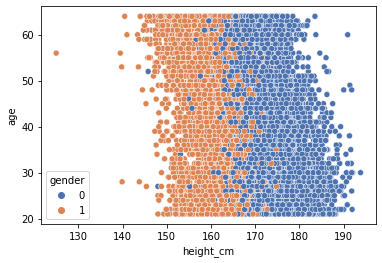

In [14]:
sns.scatterplot(data=body_perf_dc, x="height_cm", y="age", hue="gender", palette="deep")

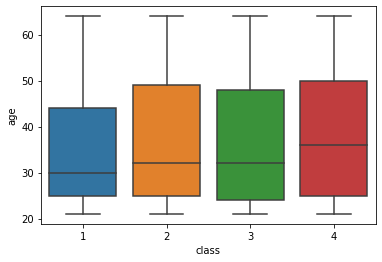

In [22]:
ax = sns.boxplot(x="class", y="age", data=body_perf_dc)

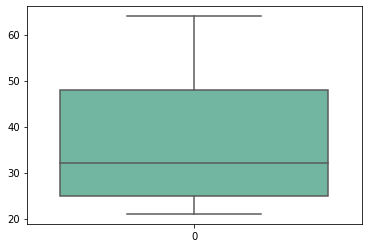

In [16]:
ax = sns.boxplot(data=body_perf_dc.age, palette="Set2")

### Machine Learning

In [17]:
def run_algo_on_data(X, y, algo_class, algo_name, **params):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    algo = algo_class(**params)
    algo.fit(train_X, train_y)
    r2_train = algo.score(train_X, train_y)
    y_predicted = algo.predict(test_X)
    accuracy = accuracy_score(test_y, y_predicted)
    print('r^2 on training data for', algo_name, '{:.2f}'.format(r2_train))
    print('Accuracy score for', algo_name, '{:.2f}'.format(accuracy))
    print('---'*10)

In [18]:
X0 = body_perf_dc.iloc[:,:-1]
y0 = body_perf_dc['class']

run_algo_on_data(X0, y0, RandomForestClassifier, 'Random Forest Classifier')
run_algo_on_data(X0, y0, AdaBoostClassifier, 'AdaBoost Classifier')
run_algo_on_data(X0, y0, SVC, 'SVC')

r^2 on training data for Random Forest Classifier 1.00
Accuracy score for Random Forest Classifier 0.74
------------------------------
r^2 on training data for AdaBoost Classifier 0.60
Accuracy score for AdaBoost Classifier 0.61
------------------------------
r^2 on training data for SVC 0.61
Accuracy score for SVC 0.61
------------------------------


In [19]:
age20_25 = body_perf_dc.loc[(body_perf_dc['age']>=20) & (body_perf_dc['age']<=25), :]
y4 = age20_25['class']
X4 = age20_25.iloc[:,1:-1]
print('\n20 - 25:\n')
run_algo_on_data(X4, y4, RandomForestClassifier, 'Random Forest Classifier', warm_start=True)

age26_50 = body_perf_dc.loc[(body_perf_dc['age']>25) & (body_perf_dc['age']<=50), :]
y5 = age26_50['class']
X5 = age26_50.iloc[:,1:-1]
print('\n25 - 50:\n')
run_algo_on_data(X5, y5, RandomForestClassifier, 'Random Forest Classifier', warm_start=True)

age51_60 = body_perf_dc.loc[(body_perf_dc['age']>50) & (body_perf_dc['age']<=60), :]
y6 = age51_60['class']
X6 = age51_60.iloc[:,1:-1]
print('\n31 - 35:\n')
run_algo_on_data(X6, y6, RandomForestClassifier, 'Random Forest Classifier', warm_start=True)

age61_plus = body_perf_dc.loc[body_perf_dc['age']>61, :]
y8 = age61_plus['class']
X8 = age61_plus.iloc[:,1:-1]
print('\n61 and above:\n')
run_algo_on_data(X8, y8, RandomForestClassifier, 'Random Forest Classifier', warm_start=True)


20 - 25:

r^2 on training data for Random Forest Classifier 1.00
Accuracy score for Random Forest Classifier 0.75
------------------------------

25 - 50:

r^2 on training data for Random Forest Classifier 1.00
Accuracy score for Random Forest Classifier 0.70
------------------------------

31 - 35:

r^2 on training data for Random Forest Classifier 1.00
Accuracy score for Random Forest Classifier 0.66
------------------------------

61 and above:

r^2 on training data for Random Forest Classifier 1.00
Accuracy score for Random Forest Classifier 0.73
------------------------------


In [20]:
body_perf_dc

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0       0      172.3      75.24        21.3       80.0     130.0   
1      25.0       0      165.0      55.80        15.7       77.0     126.0   
2      31.0       0      179.6      78.00        20.1       92.0     152.0   
3      32.0       0      174.5      71.10        18.4       76.0     147.0   
4      28.0       0      173.8      67.70        17.1       70.0     127.0   
...     ...     ...        ...        ...         ...        ...       ...   
13388  25.0       0      172.1      71.80        16.2       74.0     141.0   
13389  21.0       0      179.7      63.90        12.1       74.0     128.0   
13390  39.0       0      177.2      80.50        20.1       78.0     132.0   
13391  64.0       1      146.1      57.70        40.4       68.0     121.0   
13392  34.0       0      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0           54.9                     18.4            60.0          217.0   
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388       35.8                     17.4            47.0          198.0   
13389       33.0                      1.1            48.0          167.0   
13390       63.5                     16.4            45.0          229.0   
13391       19.3                      9.2             0.0           75.0   
13392       35.9                      7.1            51.0          180.0   

       class  
0          3  
1          1  
2          3  
3          2  
4          2  
...      ...  
13388      3  
13389      4  
13390      1  
13391      4  
13392      3  

[13393 rows x 12 columns]

[0.09298609 0.01700516 0.06612697 0.08428534 0.09955885 0.05926236
 0.06116435 0.0813889  0.19887228 0.15490075 0.08444896]


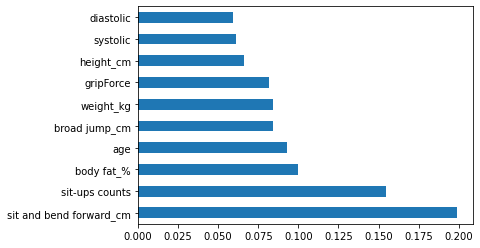

In [26]:
X = body_perf_dc.iloc[:,0:11]  #independent columns
y = body_perf_dc.iloc[:,-1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
#plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()